# Detecting Brain Tumors in MRIs using a Convolutional Neural Network(VGG)

In [11]:
#importing libaries
import numpy as np 
import pandas as pd
import random as rd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16

#setting seed for reproducability
from numpy.random import seed
seed(25)
tf.random.set_seed(50)

In [12]:
# 0 - Normal
# 1 - Tumor

data = [] #creating a list for images
paths = [] #creating a list for paths
labels = [] #creating a list to put our 0 or 1 labels

#staring with the images that have tumors
for r, d, f in os.walk(r'brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(1)

#working with the images with no tumors        
paths = []
for r, d, f in os.walk(r"brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(0)
        
data = np.array(data)
data.shape

labels = np.array(labels)
labels = labels.reshape(139,1)

print('data shape is:', data.shape)
print('labels shape is:', labels.shape)

data shape is: (139, 128, 128, 3)
labels shape is: (139, 1)


In [13]:
#we have 139 images with 128 height, 128 weight, RGB color channel
print(data.shape)

(139, 128, 128, 3)


In [14]:
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))

255
0


In [15]:
#reducing the data to between 1 and 0
data = data / 255.00
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))

1.0
0.0


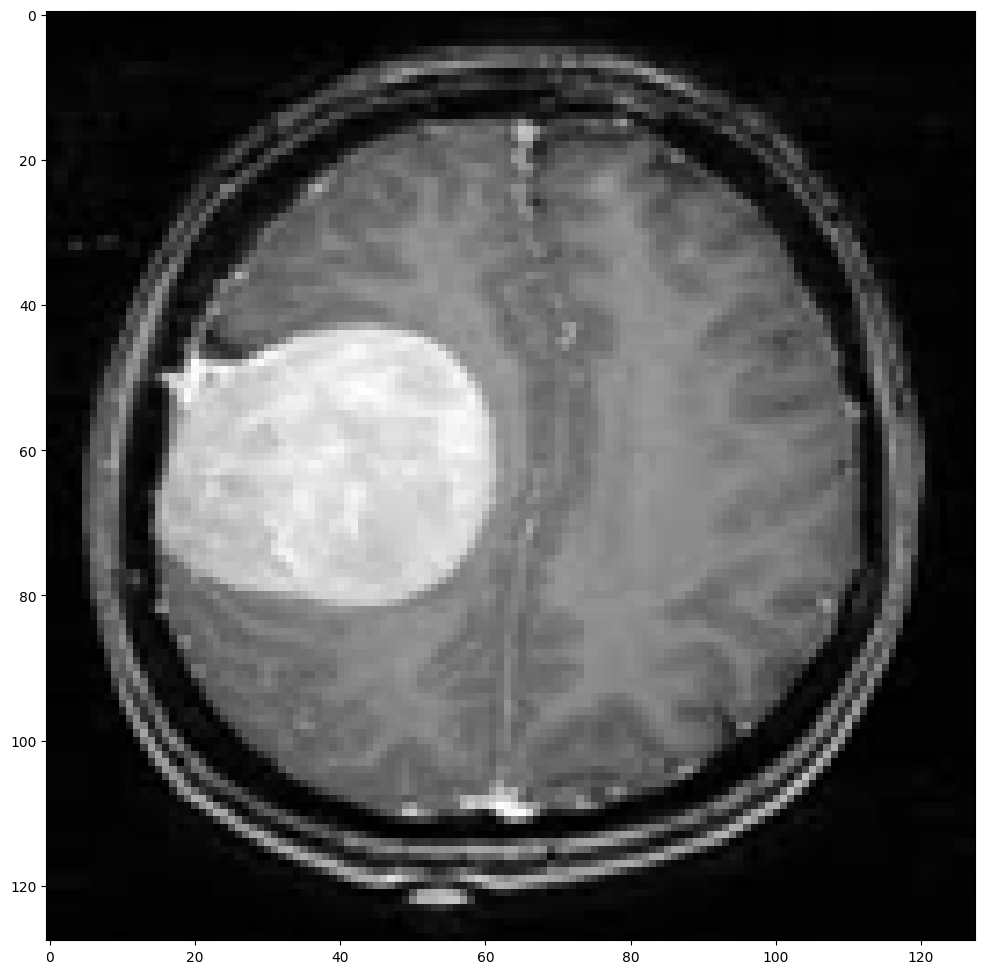

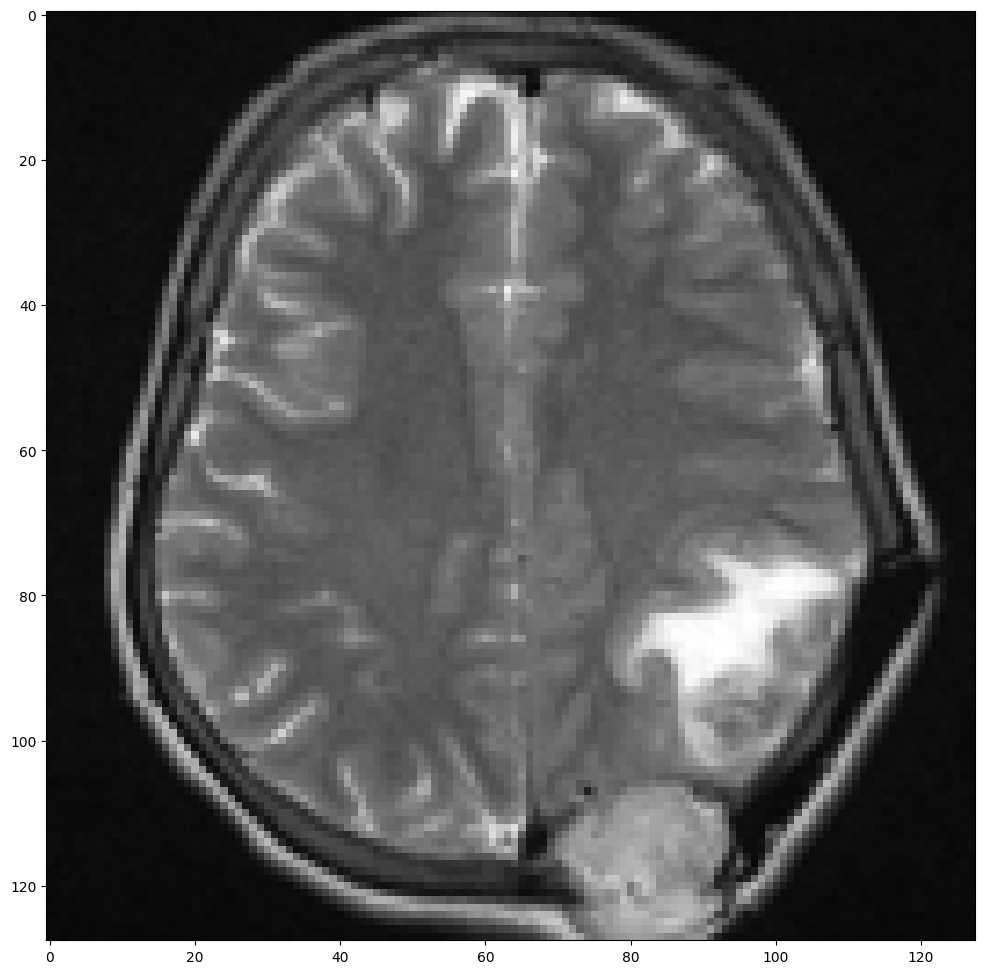

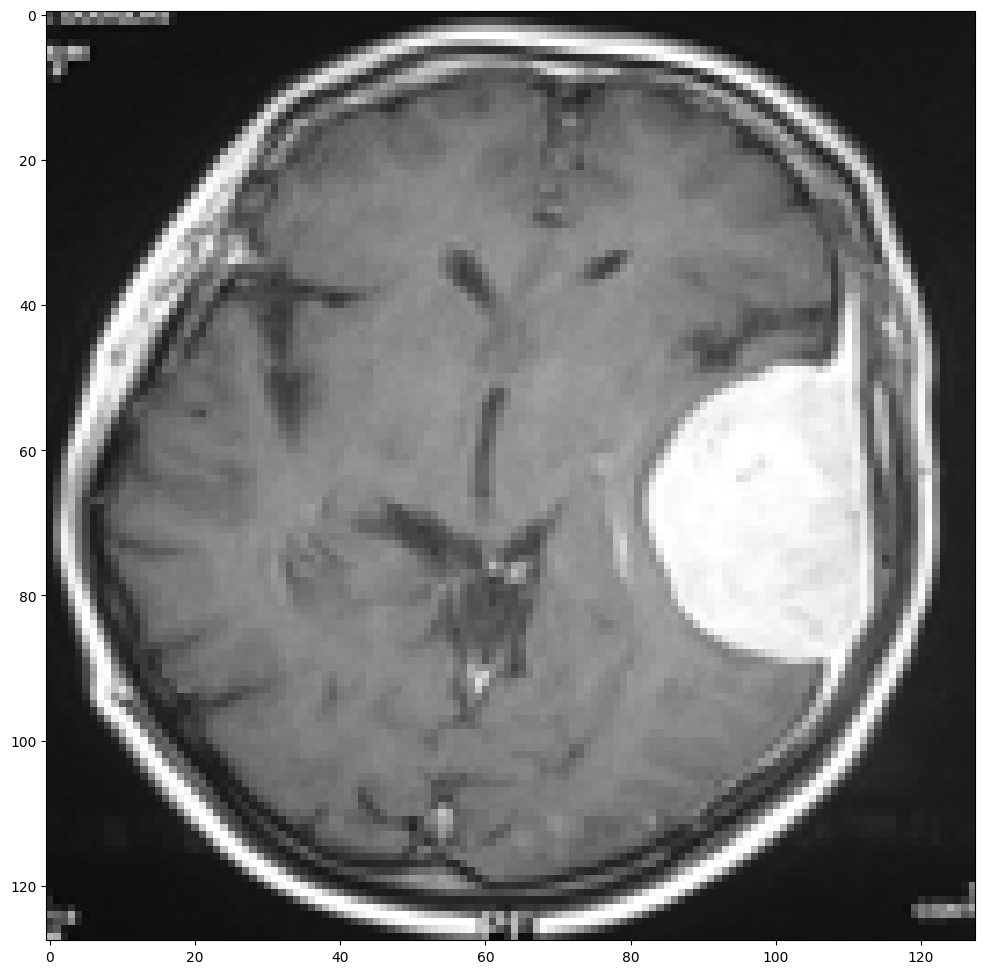

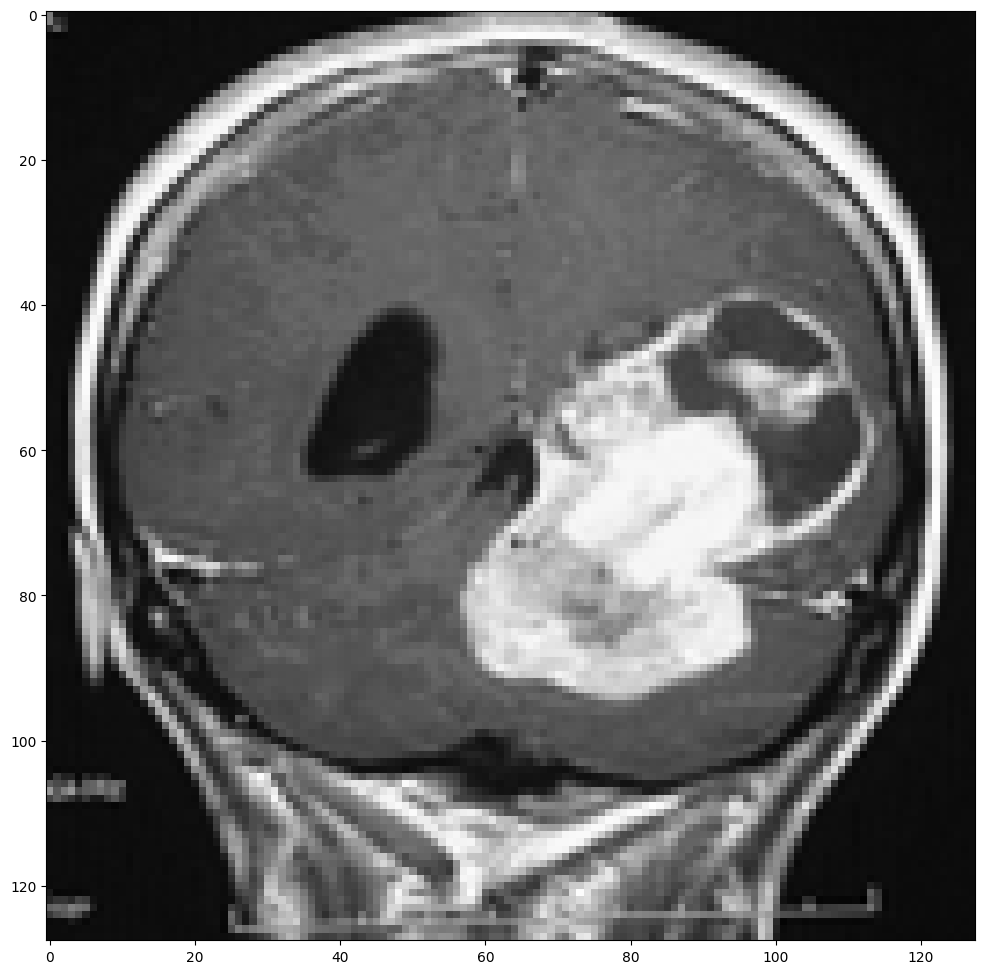

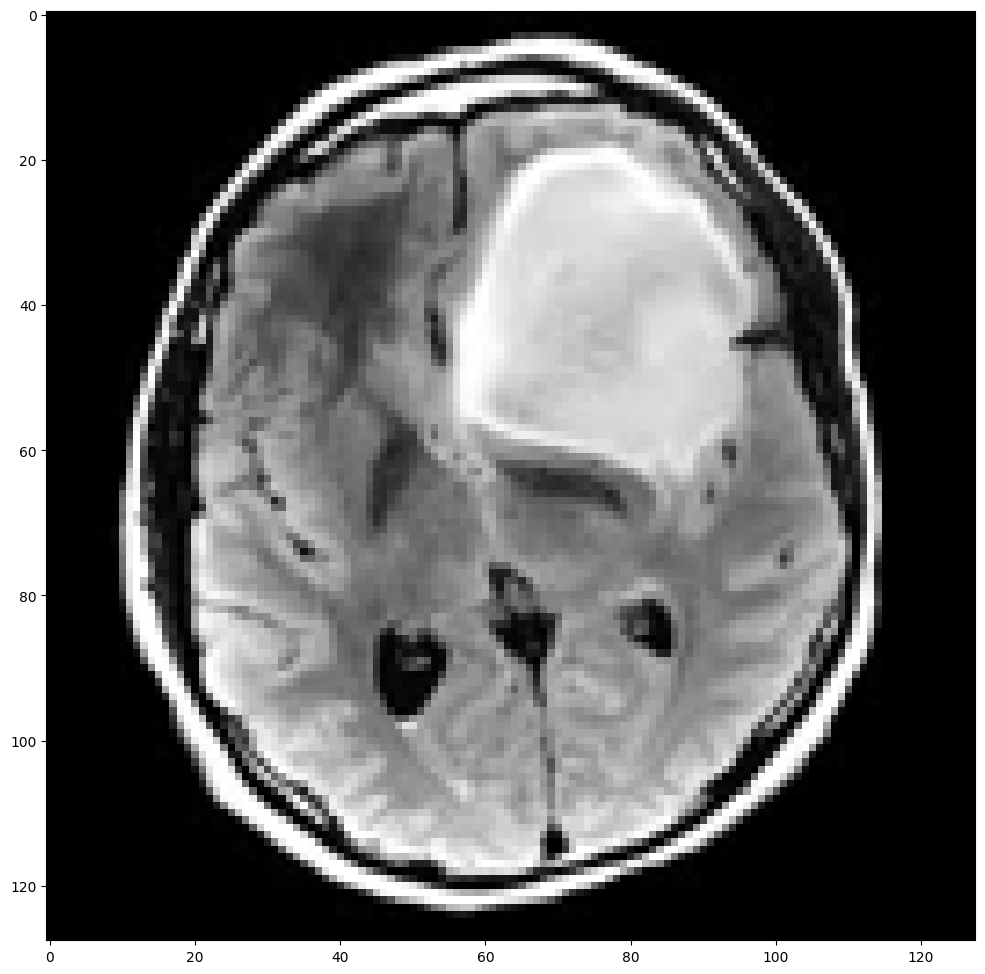

In [16]:
for i in range(5):
    fig = plt.figure(figsize=(70,70))
    plt.subplot(5,5,i+1)
    image = plt.imshow(data[i])
    plt.show(image)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size=0.3, shuffle=True, random_state=7)

In [18]:
print("shape of our training data:",x_train.shape)
print("shape of our training labels:",y_train.shape)
print("shape of our test data:",x_test.shape)
print("shape of our test labels:",y_test.shape)

shape of our training data: (97, 128, 128, 3)
shape of our training labels: (97, 1)
shape of our test data: (42, 128, 128, 3)
shape of our test labels: (42, 1)


In [19]:
model = keras.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,033 (8.93 MB)

 Trainable params: 2,340,033 (8.93 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# #including early stopping to prevent overfitting
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

In [21]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=200,
    verbose=(2),
)

Epoch 1/200
2/2 - 3s - 1s/step - accuracy: 0.4742 - loss: 0.6956 - val_accuracy: 0.5238 - val_loss: 0.6933
Epoch 2/200
2/2 - 1s - 413ms/step - accuracy: 0.5361 - loss: 0.6950 - val_accuracy: 0.5476 - val_loss: 0.6937
Epoch 3/200
2/2 - 1s - 363ms/step - accuracy: 0.5464 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 4/200
2/2 - 1s - 388ms/step - accuracy: 0.5773 - loss: 0.6896 - val_accuracy: 0.4286 - val_loss: 0.6948
Epoch 5/200
2/2 - 1s - 385ms/step - accuracy: 0.6082 - loss: 0.6873 - val_accuracy: 0.3810 - val_loss: 0.6954
Epoch 6/200
2/2 - 1s - 386ms/step - accuracy: 0.6907 - loss: 0.6819 - val_accuracy: 0.4048 - val_loss: 0.6962
Epoch 7/200
2/2 - 1s - 413ms/step - accuracy: 0.5773 - loss: 0.6843 - val_accuracy: 0.4048 - val_loss: 0.6970
Epoch 8/200
2/2 - 1s - 380ms/step - accuracy: 0.6495 - loss: 0.6788 - val_accuracy: 0.4286 - val_loss: 0.6980
Epoch 9/200
2/2 - 1s - 375ms/step - accuracy: 0.6082 - loss: 0.6750 - val_accuracy: 0.4286 - val_loss: 0.6991
Epoch 10/200


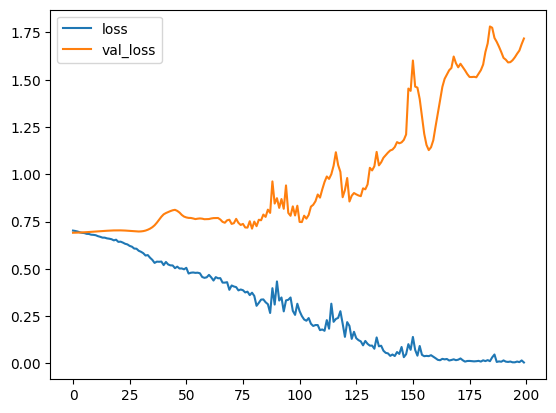

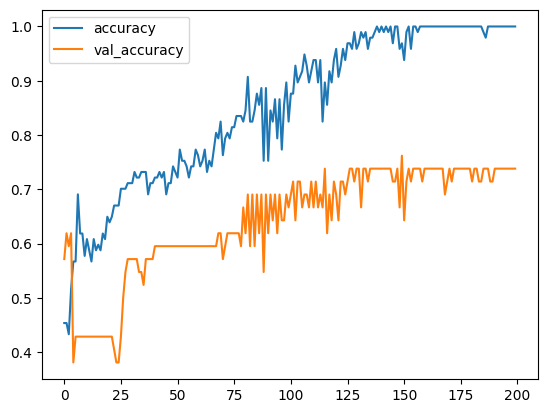

In [19]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [20]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0
     
pred = pred.astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step


In [21]:
#creating a classification report
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.76      0.79      0.78        24\n           1       0.71      0.67      0.69        18\n\n    accuracy                           0.74        42\n   macro avg       0.73      0.73      0.73        42\nweighted avg       0.74      0.74      0.74        42\n'

In [23]:
model = keras.Sequential([
    
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#including early stopping to revent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

In [25]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=100,
    callbacks=[early_stopping],
    verbose=(2),
)

Epoch 1/100
2/2 - 3s - 1s/step - accuracy: 0.4536 - loss: 0.7108 - val_accuracy: 0.5714 - val_loss: 0.6907
Epoch 2/100
2/2 - 1s - 376ms/step - accuracy: 0.4433 - loss: 0.7047 - val_accuracy: 0.5714 - val_loss: 0.6910
Epoch 3/100
2/2 - 1s - 368ms/step - accuracy: 0.4433 - loss: 0.7034 - val_accuracy: 0.5714 - val_loss: 0.6916
Epoch 4/100
2/2 - 1s - 398ms/step - accuracy: 0.4639 - loss: 0.6973 - val_accuracy: 0.4286 - val_loss: 0.6927
Epoch 5/100
2/2 - 1s - 396ms/step - accuracy: 0.5464 - loss: 0.6910 - val_accuracy: 0.3810 - val_loss: 0.6942
Epoch 6/100
2/2 - 1s - 396ms/step - accuracy: 0.5773 - loss: 0.6878 - val_accuracy: 0.4286 - val_loss: 0.6962
Epoch 7/100
2/2 - 1s - 372ms/step - accuracy: 0.5567 - loss: 0.6832 - val_accuracy: 0.4286 - val_loss: 0.6984
Epoch 8/100
2/2 - 1s - 366ms/step - accuracy: 0.5567 - loss: 0.6792 - val_accuracy: 0.4286 - val_loss: 0.7008
Epoch 9/100
2/2 - 1s - 358ms/step - accuracy: 0.5464 - loss: 0.6735 - val_accuracy: 0.4286 - val_loss: 0.7033
Epoch 10/100


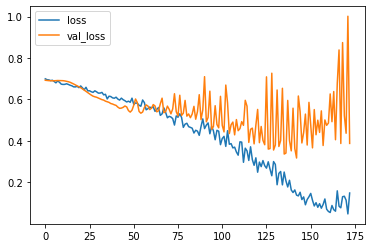

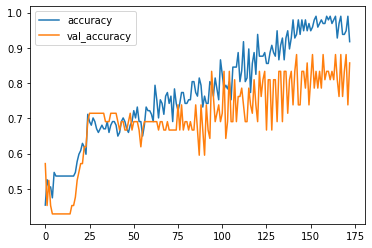

In [18]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [19]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0

pred = pred.astype(int)

In [20]:
#creating a classification report
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.83      0.89        24\n           1       0.81      0.94      0.87        18\n\n    accuracy                           0.88        42\n   macro avg       0.88      0.89      0.88        42\nweighted avg       0.89      0.88      0.88        42\n'

In [21]:
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model with ImageNet weights
base_model = VGG16(
    weights='imagenet',  # Use weights trained on ImageNet
    include_top=False,   # Exclude the top fully connected layers
    input_shape=(128, 128, 3)  # Input shape for your task
)


In [22]:
model = keras.Sequential([
    
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    
    base_model, #vgg16
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])


In [23]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#including early stopping to revent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=40,
    min_delta=0.001,
    restore_best_weights=True,
)

In [24]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=200,
    callbacks=[early_stopping],
    verbose=(2),
)

Epoch 1/200
2/2 - 30s - loss: 0.8076 - accuracy: 0.4536 - val_loss: 0.7809 - val_accuracy: 0.4286
Epoch 2/200
2/2 - 27s - loss: 0.6470 - accuracy: 0.6186 - val_loss: 0.5910 - val_accuracy: 0.6667
Epoch 3/200
2/2 - 28s - loss: 0.6182 - accuracy: 0.6289 - val_loss: 0.5434 - val_accuracy: 0.7619
Epoch 4/200
2/2 - 27s - loss: 0.5471 - accuracy: 0.7938 - val_loss: 0.6947 - val_accuracy: 0.5476
Epoch 5/200
2/2 - 27s - loss: 0.5487 - accuracy: 0.7113 - val_loss: 0.4779 - val_accuracy: 0.7857
Epoch 6/200
2/2 - 27s - loss: 0.5142 - accuracy: 0.7423 - val_loss: 0.4627 - val_accuracy: 0.8095
Epoch 7/200
2/2 - 27s - loss: 0.4375 - accuracy: 0.7732 - val_loss: 0.5544 - val_accuracy: 0.6905
Epoch 8/200
2/2 - 27s - loss: 0.4043 - accuracy: 0.8351 - val_loss: 0.3632 - val_accuracy: 0.8095
Epoch 9/200
2/2 - 27s - loss: 0.4442 - accuracy: 0.7629 - val_loss: 0.5751 - val_accuracy: 0.6190
Epoch 10/200
2/2 - 27s - loss: 0.4313 - accuracy: 0.7938 - val_loss: 0.2941 - val_accuracy: 0.9286
Epoch 11/200
2/2 - 

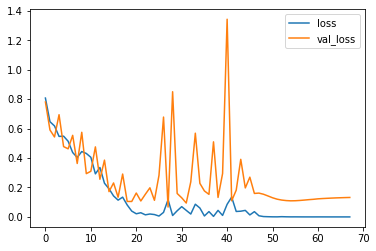

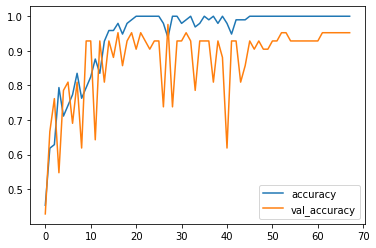

In [25]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [26]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0

pred = pred.astype(int)

In [27]:
#creating a classification report
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98        24\n           1       1.00      0.94      0.97        18\n\n    accuracy                           0.98        42\n   macro avg       0.98      0.97      0.98        42\nweighted avg       0.98      0.98      0.98        42\n'

In [30]:
# brain_tumor_dataset\yes\Y1.jpg
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Ask user for the image path
img_path = input("Enter the path to the image: ")  # take input from user

# Load the image
img = image.load_img(img_path, target_size=(128, 128))  # resize to match model's input shape

# Preprocess the image
img_array = image.img_to_array(img)  # convert image to array
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
img_array /= 255.0  # normalize the image (assuming the model was trained on normalized images)

# Make the prediction
prediction = model.predict(img_array)

# Convert prediction to binary (assuming binary classification)
if prediction > 0.5:
    print("Prediction: Class 1 (Positive)")
else:
    print("Prediction: Class 0 (Negative)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Class 1 (Positive)


In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import display, Image as IPImage
import ipywidgets as widgets
from PIL import Image, ImageDraw
import io

# Create a file upload widget
upload = widgets.FileUpload(accept='image/*', multiple=False)  # Allow only image files
display(upload)

def predict_uploaded_image(change):
    # Print the structure of upload.value for debugging
    print("Uploaded value:", upload.value)  # Show the structure of the upload value
    
    # Check if any file has been uploaded
    if upload.value:
        try:
            # Access the first uploaded file
            uploaded_file_info = upload.value[0]  # Access the first file in the tuple
            uploaded_file = uploaded_file_info['content']  # Get the content of the uploaded file

            # Print to see if we correctly obtained the file content
            print(f"Uploaded file size: {len(uploaded_file)} bytes")
            
            # Load the image from uploaded content
            img = Image.open(io.BytesIO(uploaded_file))
            img = img.resize((128, 128))  # Resize to match model's input shape

            # Preprocess the image
            img_array = image.img_to_array(img)  # Convert image to array
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            img_array /= 255.0  # Normalize the image (assuming the model was trained on normalized images)

            # Make the prediction
            prediction = model.predict(img_array)

            # Convert prediction to binary (assuming binary classification)
            if prediction > 0.5:
                print("Prediction: Class 1 (Positive) - Tumor Detected")
                # Highlight the tumor area
                draw = ImageDraw.Draw(img)
                # Here you can specify the coordinates for the bounding box
                # For demonstration, we will use a fixed box (this should be based on actual prediction)
                bounding_box = [20, 20, 108, 108]  # Example coordinates
                draw.rectangle(bounding_box, outline="red", width=3)  # Draw a red bounding box
            else:
                print("Prediction: Class 0 (Negative) - No Tumor Detected")

            # Display the image with or without the bounding box
            img.show()  # This will open the image with the bounding box if detected
            
        except Exception as e:
            print(f"Error processing the uploaded file: {e}")
    else:
        print("No file uploaded.")

# Call the predict function when an image is uploaded
upload.observe(predict_uploaded_image, names='value')


FileUpload(value=(), accept='image/*', description='Upload')

In [55]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

upload = widgets.FileUpload(accept='image/*', multiple=False)  # Allow only image files
display(upload)

def show_image(image, title="Image"):
    """Display an image using OpenCV."""
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def predict_uploaded_image(change):
    if upload.value:
        try:
            uploaded_file_info = upload.value[0]
            uploaded_file = uploaded_file_info['content'] 

            img = Image.open(io.BytesIO(uploaded_file))
            original_image = np.array(img) 
            gray = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)


            _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)  

            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
            morphed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

            contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


            for contour in contours:
                if cv2.contourArea(contour) > 500:  
                    x, y, w, h = cv2.boundingRect(contour)  
                    cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 255, 0), 2) 


            processed_image = Image.fromarray(original_image)

            processed_image.show()

        except Exception as e:
            print(f"Error processing the uploaded file: {e}")
    else:
        print("No file uploaded.")

upload.observe(predict_uploaded_image, names='value')


FileUpload(value=(), accept='image/*', description='Upload')



Model                      |     Accuracy
---------------------------|---------------
Baseline                   |     86%
Adding Data Agumentation   |     89%
Adding Pretrained Model    |     98%